# Multivariate Regression (Student Performance Prediction)

KETERANGAN KOLOM:
1. Hours Studied = Lama Belajar Per-jam
2. Previous Scores = Nilai Sebelumnya
3. Extracurricular Activities = Ekstrakulikuler/Eskul
4. Sleep Hours = Lama Tidur Per-Jam
5. Sample Question Papers Practiced = Latihan Soal
6. Performance Index = Performa Siswa (Target)
7. Predicted_Score = Nilai Prediksi (Target)

### A.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [2]:
try:
    df = pd.read_csv("Student_Performance_Multivariate.csv")
    print("Berhasil Membaca Data")
except Exception as e:
    print(f"Gagal memuat data as {e}")

Berhasil Membaca Data


In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predicted_Score
0,7,99,Yes,9,1,91.0,92.9
1,4,82,No,4,2,65.0,66.2
2,8,51,Yes,7,2,45.0,67.6
3,5,52,Yes,5,2,36.0,53.2
4,7,75,No,8,5,66.0,72.5


### A.3 Cek Dimensi Data

In [6]:
df.shape

(10000, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
 6   Predicted_Score                   10000 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 547.0+ KB


### A.4 Cek Nilai Duplikasi

In [7]:
df.duplicated().sum()

np.int64(127)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

### A.5 Cek Nilai Yang Hilang

In [10]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Predicted_Score                     0
dtype: int64

tidak ada nilai yang hilang :)

## B. Exploratory Data Analysis

### B.1 Cek Outliers

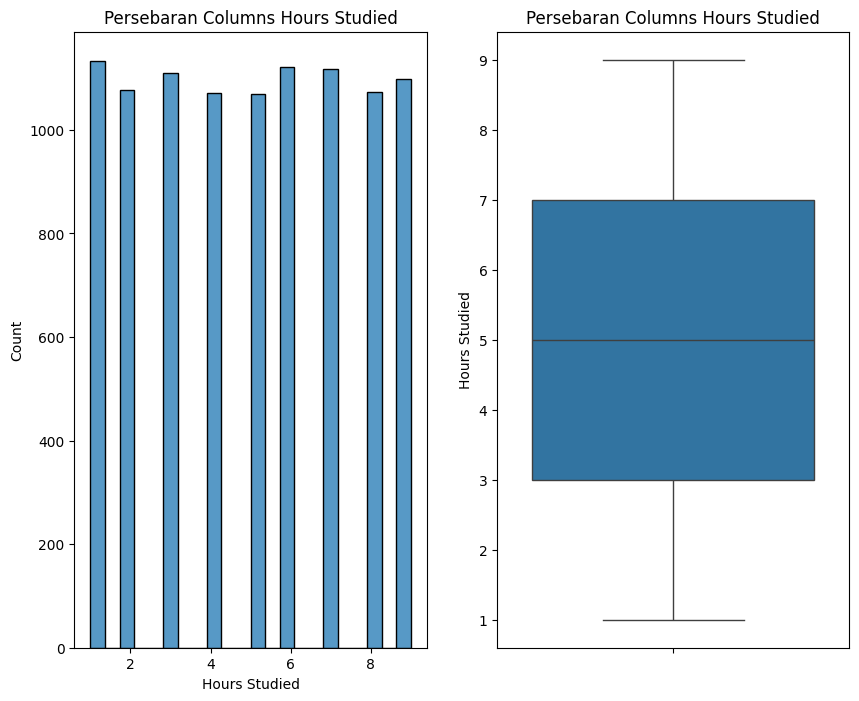

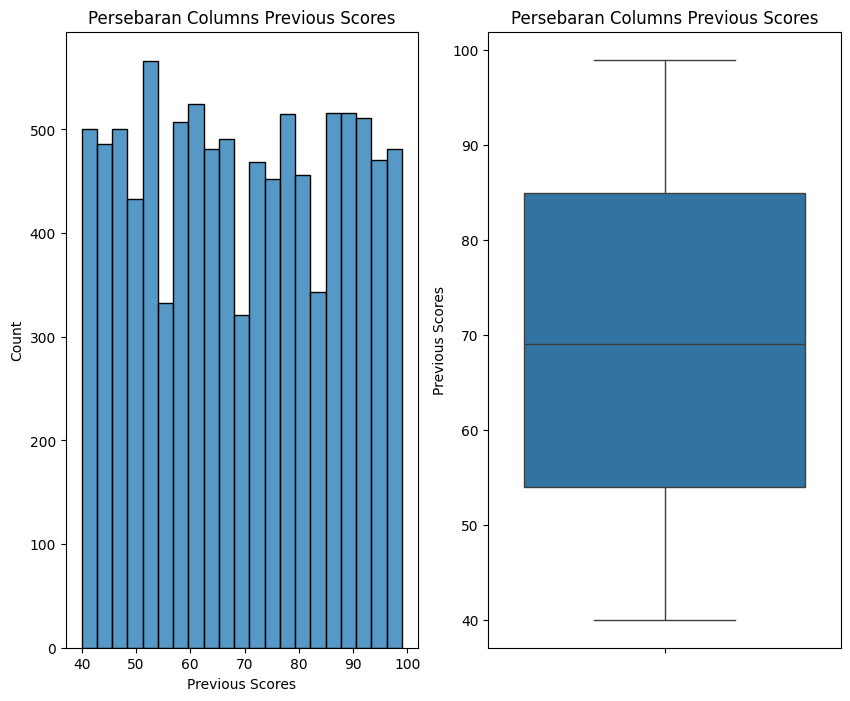

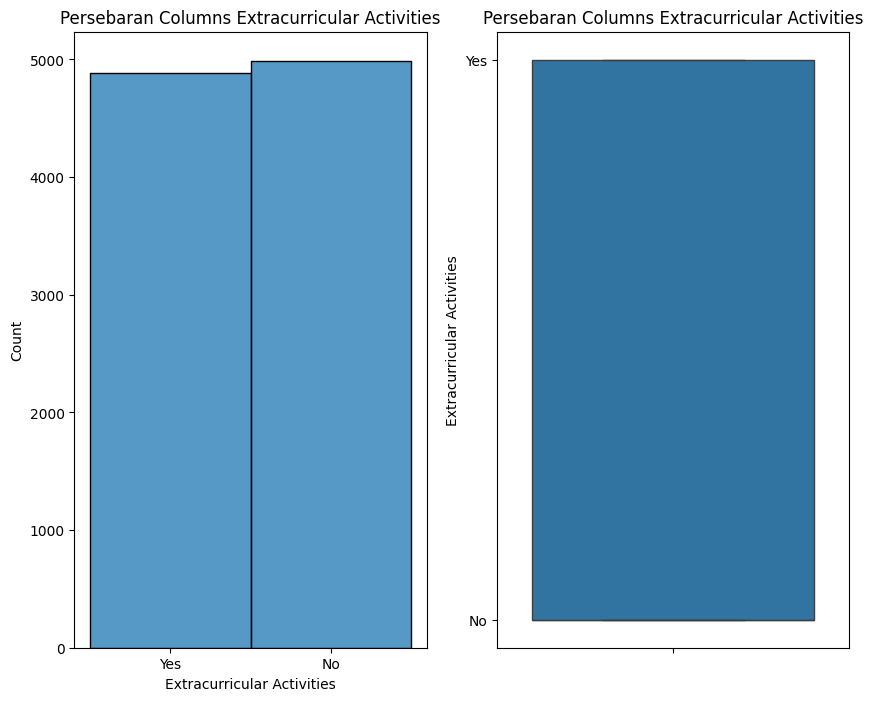

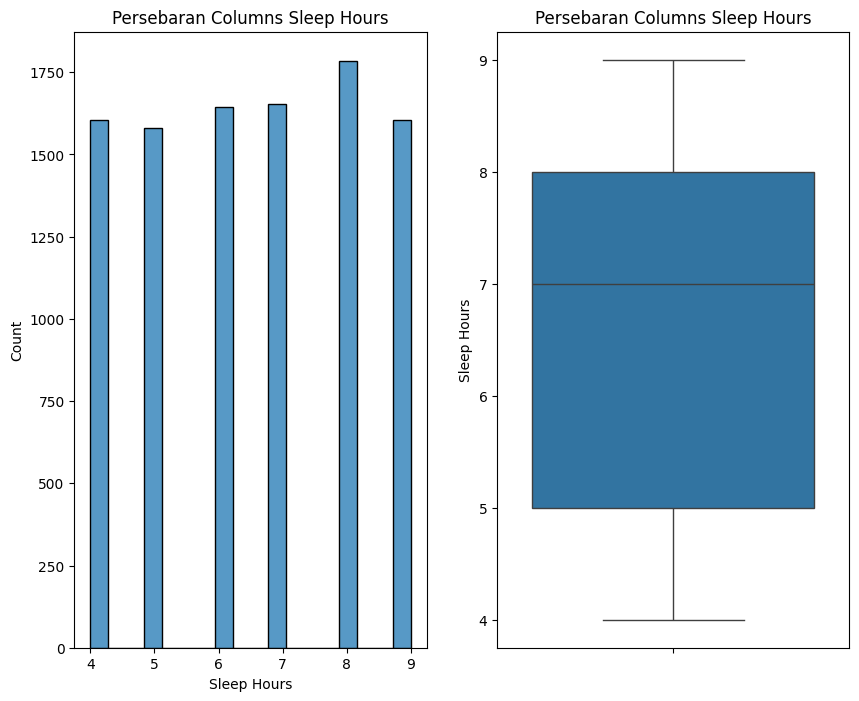

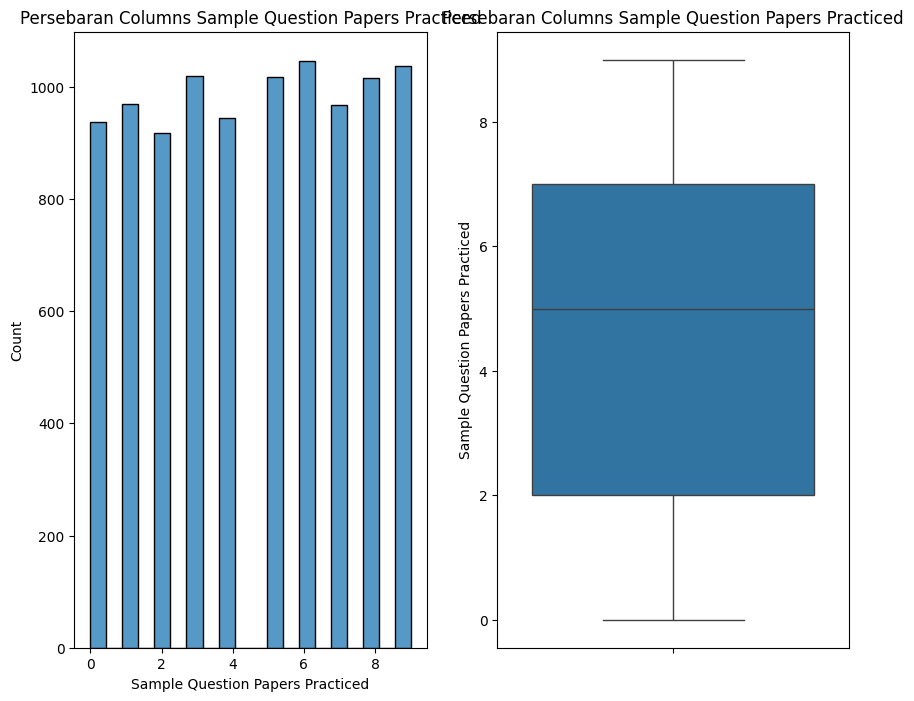

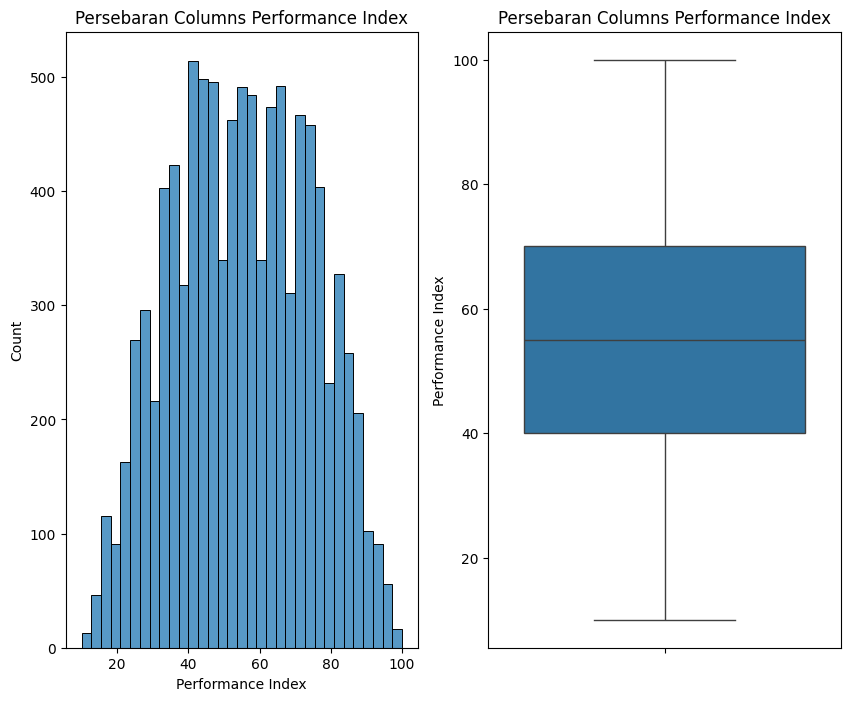

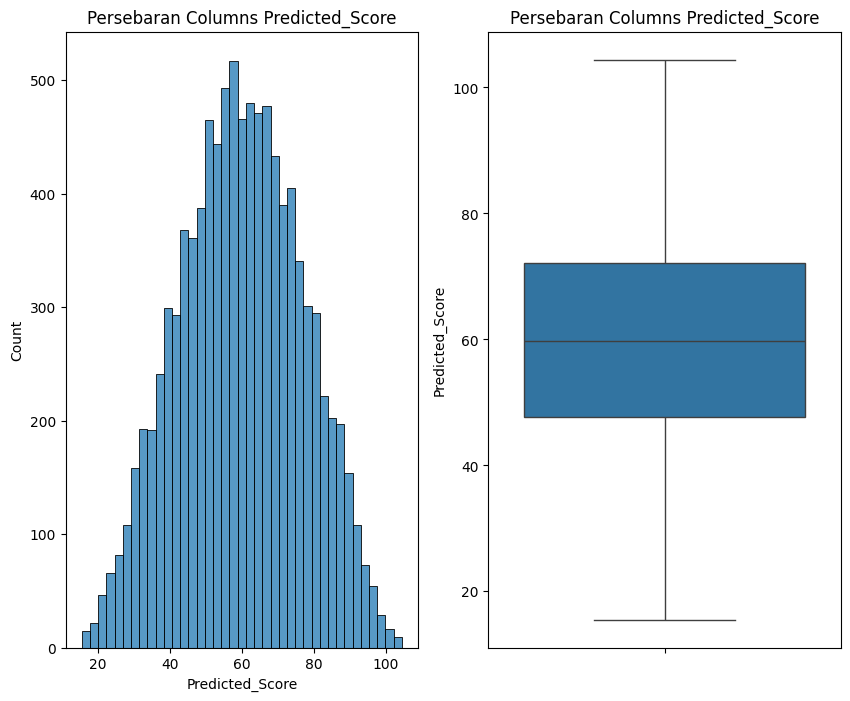

In [11]:
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")
    
plt.show()

### B.2 Visualisasi Pairplot

<Figure size 800x800 with 0 Axes>

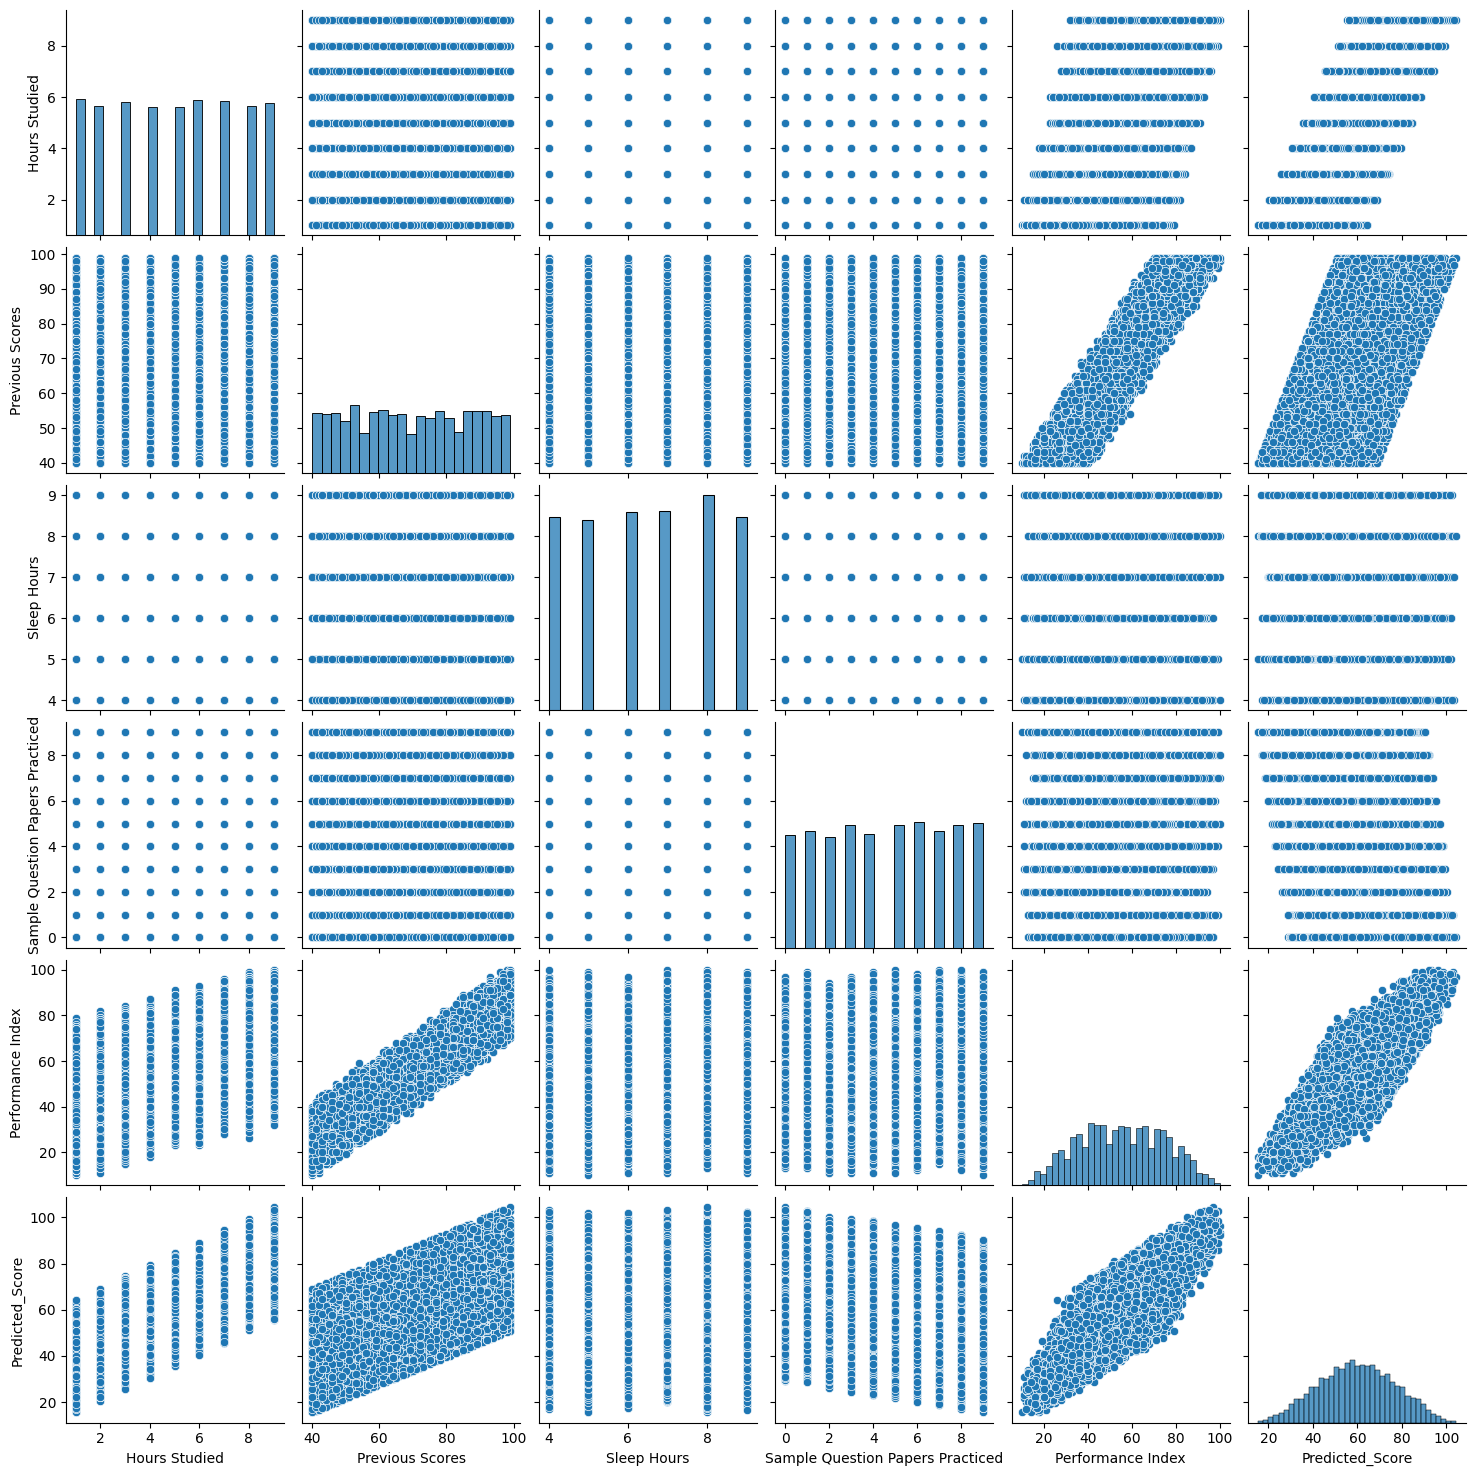

In [15]:
plt.figure(figsize=(8, 8))
num = df.select_dtypes(include='number')
sns.pairplot(num)

### B.3 Visualisasi Korelasi

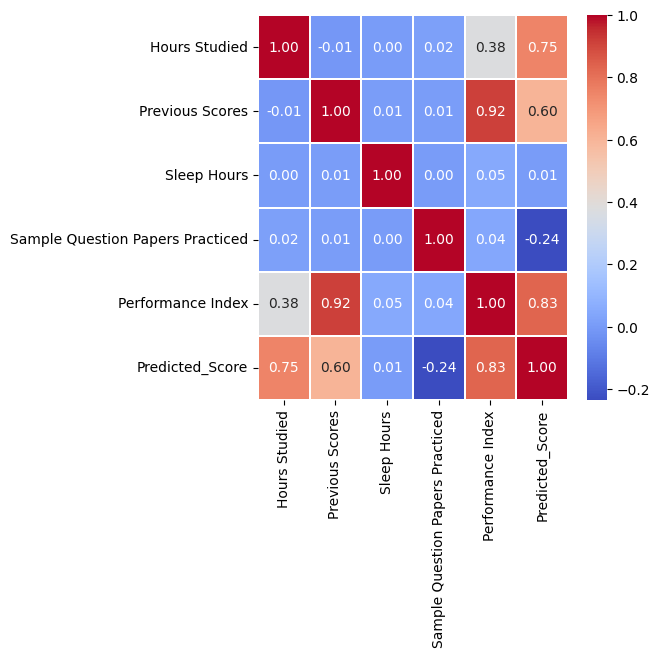

In [21]:
plt.figure(figsize=(5, 5))
sns.heatmap(num.corr(),
            annot=True,
            fmt='.2f',
            linewidths=1.1,\
                cmap='coolwarm')
plt.show()

### B.4 Encoding

In [23]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predicted_Score
0,7,99,Yes,9,1,91.0,92.9
1,4,82,No,4,2,65.0,66.2
2,8,51,Yes,7,2,45.0,67.6
3,5,52,Yes,5,2,36.0,53.2
4,7,75,No,8,5,66.0,72.5


In [24]:
mapping = {
    "Yes" : 1,
    "No" : 0
}

df['Extracurricular Activities'] = df['Extracurricular Activities'].map(mapping)

In [26]:
df['Extracurricular Activities'].head()

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64

## C. Pemodelan Data

### Rumus Inti (The Golden Formula)

Ini adalah metode **Normal Equation** untuk mencari garis regresi terbaik secara instan menggunakan Aljabar Linear (Matriks).

$$\theta = (X^T X)^{-1} X^T y$$

**Keterangan Simbol:**
* $\theta$ (**Theta**): Hasil akhir yang kita cari (Weights). Berisi koefisien (Slope/$m$) dan bias (Intercept/$c$).
* $X$ (**Features**): Data fitur/input. **Wajib** ditambah kolom angka `1` di depannya (sebagai bias).
* $y$ (**Target**): Data target (output/jawaban).
* $^T$ (**Transpose**): Operasi memutar matriks (baris menjadi kolom).
* $^{-1}$ (**Inverse**): Kebalikan matriks (analoginya seperti pembagian dalam angka biasa).

---
**Implementasi dalam Numpy:**
```python
# Asumsi X_matrix sudah memiliki kolom bias (angka 1)
theta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_data

### C.1 Persiapan Data Untuk Matriks

In [27]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Predicted_Score'],
      dtype='object')

In [43]:
X_data = df.drop(columns=['Performance Index', 'Predicted_Score'])
y_data = df[['Performance Index',
       'Predicted_Score']]

In [55]:
X_data = X_data.values
y_data = y_data.values

### C.2 Feature Scaling

In [56]:
def normalization(df):
    df = (df - df.min()) / (df.max() - df.min())
    return df

X_data = normalization(X_data)

### C.3 Modifikasi Matriks (Tambah Bias)

In [57]:
ones = np.ones((len(X_data), 1))
x_matrix = np.concatenate((ones, X_data), axis=1)

### C.3 Train Test Split (Membagi Data Latihan & Tes)

In [58]:
# 1. Acak urutan data (shuffling)
np.random.seed(42) # biar hasilnya konsisten 
indicies = np.random.permutation(len(x_matrix))

# 2. tentukan ukuran data test, disini ambil 20%
test_size = int(len(x_matrix) * 0.2)

# 3. Pisahkan Index
test_idx = indicies[:test_size]
train_idx = indicies[test_size:]


# buat Variabel Train dan Test
x_train, x_test = x_matrix[train_idx], x_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### C.4 Rumus Matriks Theta (The Normal Equation)

In [59]:
# 1. Hitung Theta dengan data train
# Kita cari rumus garis cuma pakai data latihan
theta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

# 2. Hitung prediksi
# Kita tes modelnya suruh ngerjain soal
y_pred_test = x_test @ theta

### C.5 Ambil Hasil Modelling

In [60]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Predicted_Score'],
      dtype='object')

In [61]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']
targets = ['Performance Index','Predicted_Score']

print("--- KESIMPULAN MODEL MULTIVARIATE (2 Target) ---")

for i, target_name in enumerate(targets):
    print(f"\n=== MODEL UNTUK TARGET: {target_name} ===")
    
    intercept = theta[0][i] #Nilai C
    print(f"Intercept (Nilai Dasar): {intercept:.4f}")
    
    # Siapkan string buat rumus
    rumus = f"{target_name} = {intercept:.2f}"
    
    # 2. Ambil Slope untuk 5 Fitur
    for j, feature_name in enumerate(features):
        slope = theta[j+1][i] 
        
        print(f"  - Koefisien {feature_name}: {slope:.4f}")
        
        # Tambahin ke string rumus
        sign = "+" if slope >= 0 else ""
        rumus += f" {sign} ({slope:.2f} * {feature_name})"
    
    # Cetak Rumus Akhir
    print(f"RUMUS: {rumus}")

--- KESIMPULAN MODEL MULTIVARIATE (2 Target) ---

=== MODEL UNTUK TARGET: Performance Index ===
Intercept (Nilai Dasar): 11.4949
  - Koefisien Hours Studied: 22.8088
  - Koefisien Previous Scores: 60.0881
  - Koefisien Extracurricular Activities: 0.5733
  - Koefisien Sleep Hours: 2.3597
  - Koefisien Sample Question Papers Practiced: 1.6982
RUMUS: Performance Index = 11.49 + (22.81 * Hours Studied) + (60.09 * Previous Scores) + (0.57 * Extracurricular Activities) + (2.36 * Sleep Hours) + (1.70 * Sample Question Papers Practiced)

=== MODEL UNTUK TARGET: Predicted_Score ===
Intercept (Nilai Dasar): 29.0000
  - Koefisien Hours Studied: 40.0000
  - Koefisien Previous Scores: 35.4000
  - Koefisien Extracurricular Activities: 0.0000
  - Koefisien Sleep Hours: 0.0000
  - Koefisien Sample Question Papers Practiced: -13.5000
RUMUS: Predicted_Score = 29.00 + (40.00 * Hours Studied) + (35.40 * Previous Scores) + (0.00 * Extracurricular Activities) + (0.00 * Sleep Hours)  (-13.50 * Sample Questio

### C.6 Visualisasi Hasil Regresi

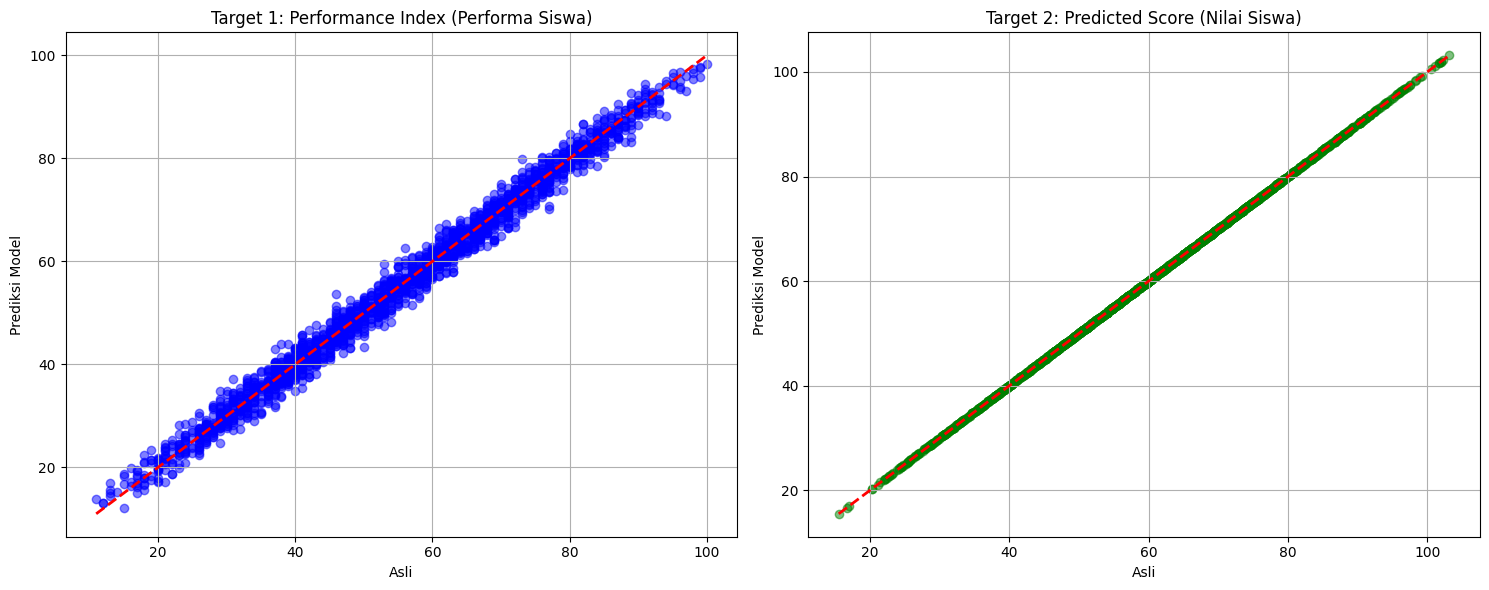

In [64]:
# Kita buat kanvas dengan 2 kolom (Kiri & Kanan)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- GRAFIK 1: PERFORMANCE INDEX (Performa Siswa) ---
# Kita ambil kolom index 0 ([:, 0])
ax1.scatter(y_test[:, 0], y_pred_test[:, 0], color='blue', alpha=0.5)

# Garis Merah Diagonal
min_val1 = min(y_test[:, 0].min(), y_pred_test[:, 0].min())
max_val1 = max(y_test[:, 0].max(), y_pred_test[:, 0].max())
ax1.plot([min_val1, max_val1], [min_val1, max_val1], 'r--', linewidth=2)

ax1.set_title('Target 1: Performance Index (Performa Siswa)')
ax1.set_xlabel('Asli')
ax1.set_ylabel('Prediksi Model')
ax1.grid(True)

# --- GRAFIK 2: PREDICTED SCORE (Target Kedua) ---
# Kita ambil kolom index 1 ([:, 1])
ax2.scatter(y_test[:, 1], y_pred_test[:, 1], color='green', alpha=0.5)

# Garis Merah Diagonal
min_val2 = min(y_test[:, 1].min(), y_pred_test[:, 1].min())
max_val2 = max(y_test[:, 1].max(), y_pred_test[:, 1].max())
ax2.plot([min_val2, max_val2], [min_val2, max_val2], 'r--', linewidth=2)

ax2.set_title('Target 2: Predicted Score (Nilai Siswa)')
ax2.set_xlabel('Asli')
ax2.set_ylabel('Prediksi Model')
ax2.grid(True)

plt.tight_layout()
plt.show()

## D. Evaluasi Model

### D.1 Hitung MSE (Mean Squared Error)
Rata-rata kesalahan kuadrat (selisih riil dalam satuan kuadrat).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [65]:
error = y_test - y_pred_test
mse = np.mean(error ** 2)
mse

np.float64(2.1532018083927253)

### D.2 Hitung MAE (Mean Absolute Error)
Rata-rata kesalahan mutlak (selisih riil dalam satuan asli).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [66]:
mae = np.mean(np.abs(error))
mae

np.float64(0.8234370411536164)

### D.3 Hitung R-Squared (Akurasi)
Seberapa pintar model menjelaskan pola data (dalam persen).
- Nilai Bagus: Semakin mendekati 1 (100%) semakin bagus.

In [67]:
# Rumus: 1 - (Error Model Kita / Error Rata-rata Polos)
ss_residual = np.sum(error ** 2)
ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
r2_score = 1 - (ss_residual / ss_total)
r2_score

np.float64(0.9987108939431076)

### D.4 Perbandingan Latihan dengan Ujian (Mencegah Overfitting)

In [69]:
#Hitung Akurasi Latihan (Train Set)
y_pred_train = x_train @ theta

error_train = y_train - y_pred_train
ss_res_train = np.sum(error_train ** 2)
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = 1 - (ss_res_train / ss_tot_train)

#Hitung Akurasi Ujian (Test Set)
error_test = y_test - y_pred_test
ss_res_test = np.sum(error_test ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)

#Perbandingan
print(f"R2 Score Training : {r2_train:.5f}")
print(f"R2 Score Testing  : {r2_test:.5f}")
print(f"Selisih (Gap)     : {abs(r2_train - r2_test):.5f}")

#Analisa=
if abs(r2_train - r2_test) > 0.10: # Kalau bedanya lebih dari 10%
    print("\nOverfitting")
else:
    print("\nGood Fit")

R2 Score Training : 0.99379
R2 Score Testing  : 0.99356
Selisih (Gap)     : 0.00023

Good Fit
